In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.colors import LogNorm
from sklearn import mixture

In [29]:
# samples 들의 갯수 
n_samples = 300

In [30]:
# generate spherical data centered on (20,20)

# np.random.randn(n_samples, 2) --> 300행 2열 
# np.array([20, 20]             --> 1행 2열
# use broadcasting
shifted_gaussian = np.random.randn(n_samples, 2) + np.array([20, 20])

In [31]:
# generate zero centered stretched Gaussian data 

# C --> 2행 2열
C = np.array([[0., -0.7], [3.5, .7]])

# np.dot --> 벡터 연산 
# stretched_gaussian = 300 X 2 . 2 X 2 --> 300행 2열 
stretched_gaussian = np.dot(np.random.randn(n_samples, 2), C)

In [32]:
# concatenate the two datasets into the final training set 
X_train = np.vstack([shifted_gaussian, stretched_gaussian])

In [33]:
# fit a Gaussian Mixture model with two components 
clf = mixture.GaussianMixture(n_components=2, covariance_type='full')
clf.fit(X_train)

GaussianMixture(n_components=2)

In [46]:
# display predicted scores by the model as a contour plot 
x = np.linspace(-20., 30.)
y = np.linspace(-20., 40.)

X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)

M = np.array([X.ravel(), Y.ravel()]).T 

(50, 50) (50, 50)


In [47]:
# 계산된 것을 z에다가 적용시켜 준다. 
Z = -clf.score_samples(M)
Z = Z.reshape(X.shape)
print(Z.shape)

(50, 50)


(50, 50)

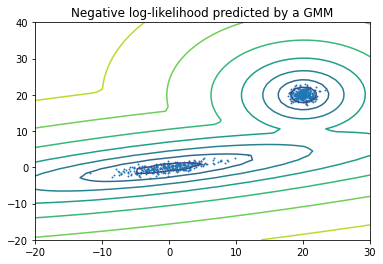

In [43]:
CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                levels=np.logspace(0,3,10))

# CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.scatter(X_train[:, 0], X_train[:, 1], .8)
plt.title('Negative log-likelihood predicted by a GMM')
plt.axis('tight')
plt.show()